In [1]:
from ydata_profiling import ProfileReport
from datetime import datetime
import dtale

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

import re

import warnings

%matplotlib inline

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

---
---

In [2]:
df_daily_activity_merged = pd.read_csv('dailyActivity_merged.csv')

In [3]:
df_daily_activity_merged.shape

(940, 15)

Dataset has 940 observations in 15 columns.

First 5 observations are shown below.

In [4]:
df_daily_activity_merged.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


These are the column names:

In [5]:
df_daily_activity_merged.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

---
### Data Dictionary

| Column Name                | Description                                              |
| -------------------------- | -------------------------------------------------------- |
| Id                         | Unique identifier for each record in the dataframe       |
| ActivityDate               | Date of the activity or measurement                       |
| TotalSteps                 | Total number of steps taken                              |
| TotalDistance              | Total distance covered                                   |
| TrackerDistance            | Distance measured by a tracking device                   |
| LoggedActivitiesDistance   | Distance covered during logged activities                |
| VeryActiveDistance         | Distance covered during very active activities           |
| ModeratelyActiveDistance   | Distance covered during moderately active activities     |
| LightActiveDistance        | Distance covered during light active activities          |
| SedentaryActiveDistance    | Distance covered during sedentary active activities      |
| VeryActiveMinutes          | Total minutes spent in very active activities            |
| FairlyActiveMinutes        | Total minutes spent in fairly active activities          |
| LightlyActiveMinutes       | Total minutes spent in lightly active activities         |
| SedentaryMinutes           | Total minutes spent in a sedentary state                 |
| Calories                   | Total number of calories burned                          |

---

Since the Data Analysis will be performed in Python let's convert the column names to snake_case.

In [6]:
# Function to convert PascalCase to snake_case
def pascal_to_snake(column_name):
    name_with_underscore = re.sub(r'(?<!^)(?=[A-Z])', '_', column_name)
    return name_with_underscore.lower()

# Convert column names from PascalCase to snake_case
df_daily_activity_merged.columns = [pascal_to_snake(col) for col in df_daily_activity_merged.columns]

# Print the updated column names
print(df_daily_activity_merged.columns)

Index(['id', 'activity_date', 'total_steps', 'total_distance',
       'tracker_distance', 'logged_activities_distance',
       'very_active_distance', 'moderately_active_distance',
       'light_active_distance', 'sedentary_active_distance',
       'very_active_minutes', 'fairly_active_minutes',
       'lightly_active_minutes', 'sedentary_minutes', 'calories'],
      dtype='object')


---

In [7]:
df_daily_activity_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          940 non-null    int64  
 1   activity_date               940 non-null    object 
 2   total_steps                 940 non-null    int64  
 3   total_distance              940 non-null    float64
 4   tracker_distance            940 non-null    float64
 5   logged_activities_distance  940 non-null    float64
 6   very_active_distance        940 non-null    float64
 7   moderately_active_distance  940 non-null    float64
 8   light_active_distance       940 non-null    float64
 9   sedentary_active_distance   940 non-null    float64
 10  very_active_minutes         940 non-null    int64  
 11  fairly_active_minutes       940 non-null    int64  
 12  lightly_active_minutes      940 non-null    int64  
 13  sedentary_minutes           940 non

Data checked for Nulls ✓

---

Since the "id" column is an identifier and doesn't hold any numerical meaning,
we will convert it to an object data type.

Note that interesting connections between the ID and other factors could be made,
e.g. IDs starting with certain numbers belong to certain device models, which might
be used for specific activities. However, without being able to verify this with the manufacturer, we will not be able to conduct such an analysis.

In [8]:
df_daily_activity_merged['id'] = df_daily_activity_merged['id'].astype(str)

In [9]:
# Convert the 'dates' column to datetime objects with the appropriate format
df_daily_activity_merged['activity_date'] = pd.to_datetime(df_daily_activity_merged['activity_date'], format='%m/%d/%Y')

# Check the data type of the 'dates' column after conversion
print(df_daily_activity_merged['activity_date'].dtype)

datetime64[ns]


Verify data timeframe

In [10]:
# Find the minimum and maximum dates
min_date = df_daily_activity_merged['activity_date'].min()
max_date = df_daily_activity_merged['activity_date'].max()

# Calculate the difference in days
delta = max_date - min_date

# Print the time range and the difference in days
print('Time range:', min_date, 'to', max_date)
print('Difference is', delta.days, 'days')

Time range: 2016-04-12 00:00:00 to 2016-05-12 00:00:00
Difference is 30 days


The data was collected over the course of one month (30 days)

In [11]:
df_daily_activity_merged.describe()

,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories
count,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


How many unique IDs (users) are there in the dataset?

In [12]:
unique_ids = df_daily_activity_merged['id'].nunique()
unique_ids

33

The number of unique IDs in the dataset is 33. Since the dataset description mentioned 30 users it is unclear if the discrepancy is because of an inaccuracy when specifying the number. Online research suggests that FitBit does not give out multiple IDs for users with multiple devices. So it is unlikely that users with multiple devices resulted in the discrepancy. Thus the discrepancy is currently not known to negatively influence the analysis in any way.

---
---
## Data profiling

### YData-Profiling

YData-Profiling, formerly known as Pandas Profiling, is an automated data analysis tool that generates comprehensive reports on datasets. It provides valuable insights, statistical summaries, and visualizations, helping data scientists and analysts understand their data quickly and effectively. It is useful for tasks like data preprocessing, quality assessment, and exploratory analysis, providing a solid foundation for further analysis and decision-making.

The profile generation is currently commented out with "#" to prevent it from being generated each time the notebook is run.

In [13]:
#profile = ProfileReport(df_daily_activity_merged, title="Pandas Profiling Report")
#profile.to_widgets()

---

### D-Tale-Profiling
D-Tale is a Python library that provides interactive data exploration and profiling capabilities for pandas DataFrames. It allows users to easily analyze, visualize, and understand their data through an intuitive and interactive web-based interface. D-Tale profiling offers features such as summary statistics, data visualization, data filtering, correlation analysis, and more. It helps users gain insights into their data, identify patterns, and make data-driven decisions efficiently. 

In [14]:
# Create a copy of your original dataframe
masses2 = df_daily_activity_merged.copy()

# Generate a D-Tale report in the notebook
dt = dtale.show(masses2, notebook=True)

In order to conclude the brief comparison between YData-Profiling and DTale, there strengths and weaknesses will be briefly addressed here.

YData-Profiling and D-Tale both serve as data profiling tools but have different strengths.
 
YData-Profiling provides a detailed analysis of the data, ideal for in-depth exploratory data analysis. It's excellent for understanding complex data behavior and offers an exhaustive overview of the dataset including descriptive statistics and metadata analysis. It also supports continuous data quality improvement to maintain high standards.

D-Tale, on the other hand, excels in providing a fast and interactive data exploration experience. It's user-friendly with its hands-on approach and wide range of visualizations, enabling users to comprehend data more easily. It also has built-in data cleaning features, making it a versatile tool. Its selling point is its speed, as it operates significantly faster than YData-Profiling.

Hence, the choice between YData-Profiling and D-Tale depends on the specificity of use-cases and user preferences.

---
---

To clearly comment on the most important results of the data-profiling they will be repeated here

The duration of FitBit usage during the 31-day period is crucial for interpreting the analysis, as days with no recorded activity indicate that the user was not wearing the FitBit.

- Histograms to show how much users wore their FitBits in timeframe of data collection

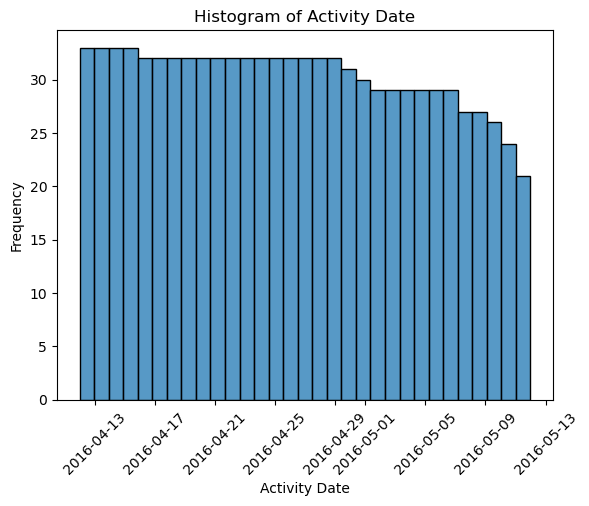

In [15]:
# Histogram of "activity_date" with adjusted x-axis ticks
sns.histplot(data=df_daily_activity_merged, x='activity_date', bins=31)
plt.xlabel('Activity Date')
plt.ylabel('Frequency')
plt.title('Histogram of Activity Date')

# Adjust the x-axis
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

plt.show()

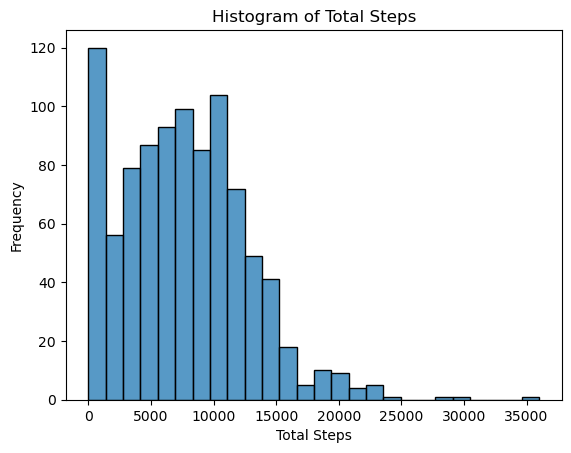

Range of the smallest bin: 3601.9


In [16]:
# Histogram of "total_steps" using Seaborn
sns.histplot(data=df_daily_activity_merged, x='total_steps')
plt.xlabel('Total Steps')
plt.ylabel('Frequency')
plt.title('Histogram of Total Steps')
plt.show()

# Get the histogram bins
hist, bins = np.histogram(df_daily_activity_merged['total_steps'])

# Calculate the range of the smallest bin
smallest_bin_range = bins[1] - bins[0]
print("Range of the smallest bin:", smallest_bin_range)

The histogram reveals that the majority of observations exhibit a low number of daily steps, typically falling within the range of 0 to approximately 3600.

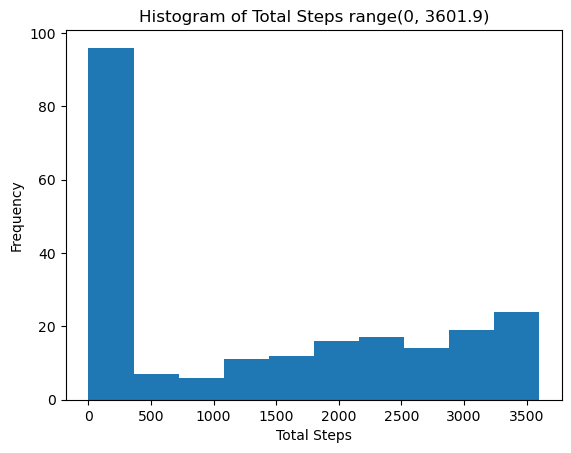

In [17]:
# Create a histogram with multiple bins within the range of 0 to 3601.9
plt.hist(df_daily_activity_merged['total_steps'], bins=10, range=(0, 3601.9))
plt.xlabel('Total Steps')
plt.ylabel('Frequency')
plt.title('Histogram of Total Steps range(0, 3601.9)')
plt.show()

In [18]:
df_daily_activity_merged[df_daily_activity_merged['total_steps'] == 0].shape[0]

77

Splitting up the smallest bin into finer bins suggests that the majority of the low values are from days on which the user didn't wear the FitBit at all, or very little.

The number of observations where the FitBit recorded 0 steps for the whole day (**Zero Days**) is 77.

---

### Correlation heatmap

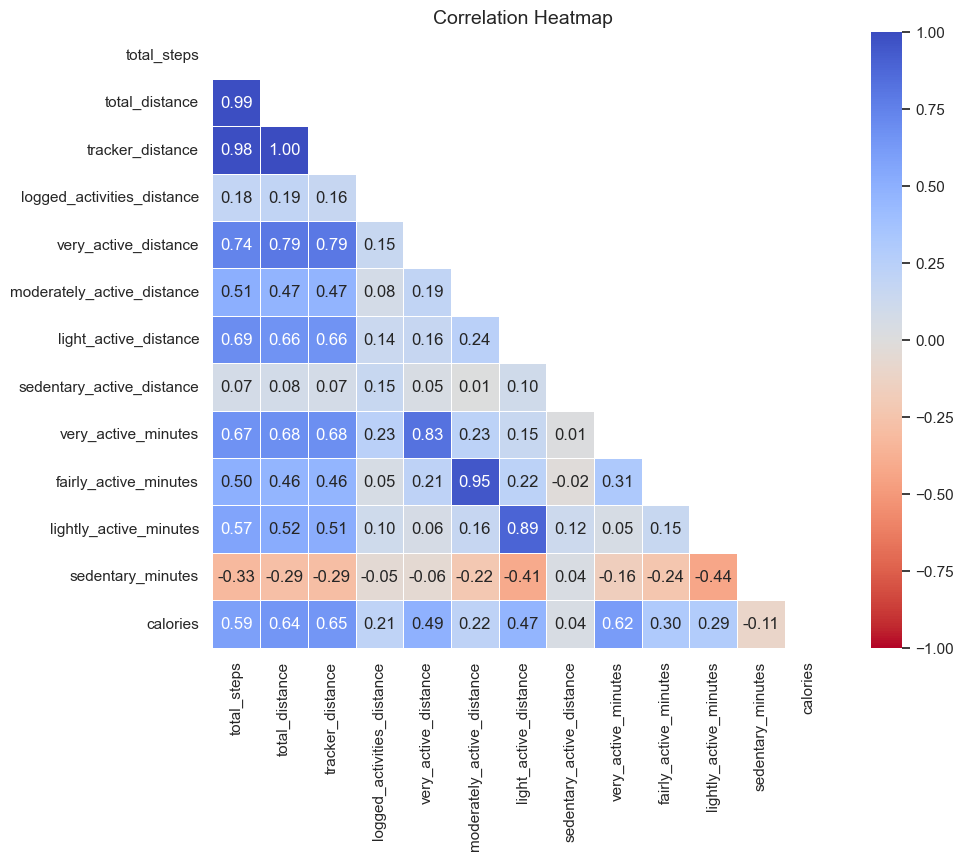

2023-10-17 16:07:12,626 - INFO     - Executing shutdown due to inactivity...
2023-10-17 16:07:16,730 - INFO     - Executing shutdown...
2023-10-17 16:07:16,734 - ERROR    - Exception on /shutdown [GET]
Traceback (most recent call last):
  File "c:\Users\jer93\anaconda3\lib\site-packages\flask\app.py", line 2529, in wsgi_app
    response = self.full_dispatch_request()
  File "c:\Users\jer93\anaconda3\lib\site-packages\flask\app.py", line 1825, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "c:\Users\jer93\anaconda3\lib\site-packages\flask\app.py", line 1823, in full_dispatch_request
    rv = self.dispatch_request()
  File "c:\Users\jer93\anaconda3\lib\site-packages\flask\app.py", line 1799, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "c:\Users\jer93\anaconda3\lib\site-packages\dtale\app.py", line 440, in shutdown
    shutdown_server()
  File "c:\Users\jer93\anaconda3\lib\site-packages\dtale\app.py", line

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df_daily_activity_merged.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Plot the correlation heatmap with the masked upper triangle
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm_r", vmin=-1, vmax=1, center=0, linewidths=0.5, mask=mask)

plt.title("Correlation Heatmap", fontsize=14)
plt.show()

- total_steps, total_distance, tracker_distance is nearly identical
- the values for the various active_distance categories and active_minutes categories also correlate fairly well with each other implying good sensor functionality
- calories correlates strongly with total_steps, total_distance and tracker_distance. Interesting to note is the strong correlation with the "very_active" categories compared to less intense activities

---
---
#### Plotting the data for a random Id, here 1503960366 to get a feel for the data

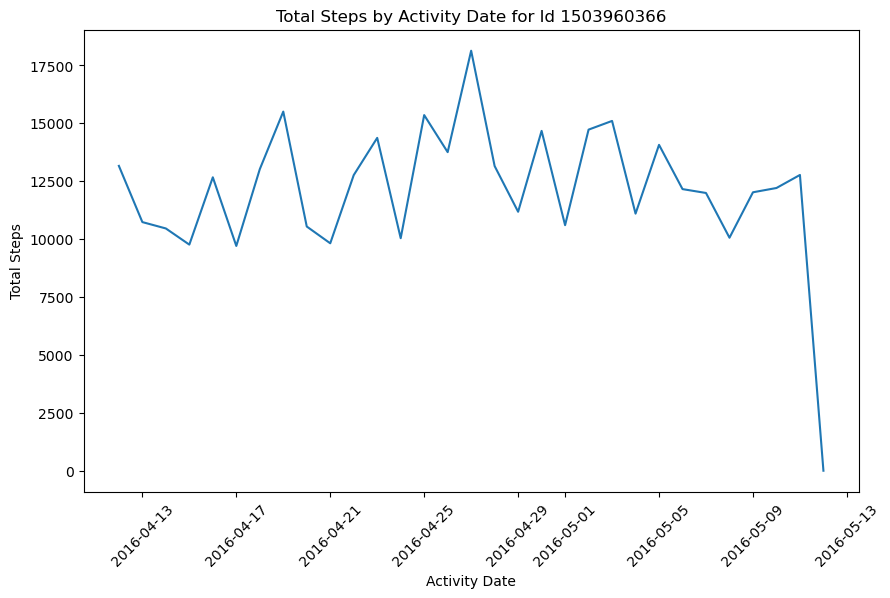

In [20]:
# Filter rows where Id is 1503960366
filtered_df = df_daily_activity_merged[df_daily_activity_merged['id'] == '1503960366']

# Extract the TotalSteps and ActivityDate columns
total_steps = filtered_df['total_steps']
activity_date = filtered_df['activity_date']

# Plot TotalSteps against ActivityDate
plt.figure(figsize=(10, 6))
plt.plot(activity_date, total_steps)
plt.xlabel('Activity Date')
plt.ylabel('Total Steps')
plt.title('Total Steps by Activity Date for Id 1503960366')
plt.xticks(rotation=45)
plt.show()


Let's check if the total steps are 0 for the 6 users with the lowest ID number for the last logged date. Maybe the device wasn't able to capture a whole day of data on the last day and thus returned 0.

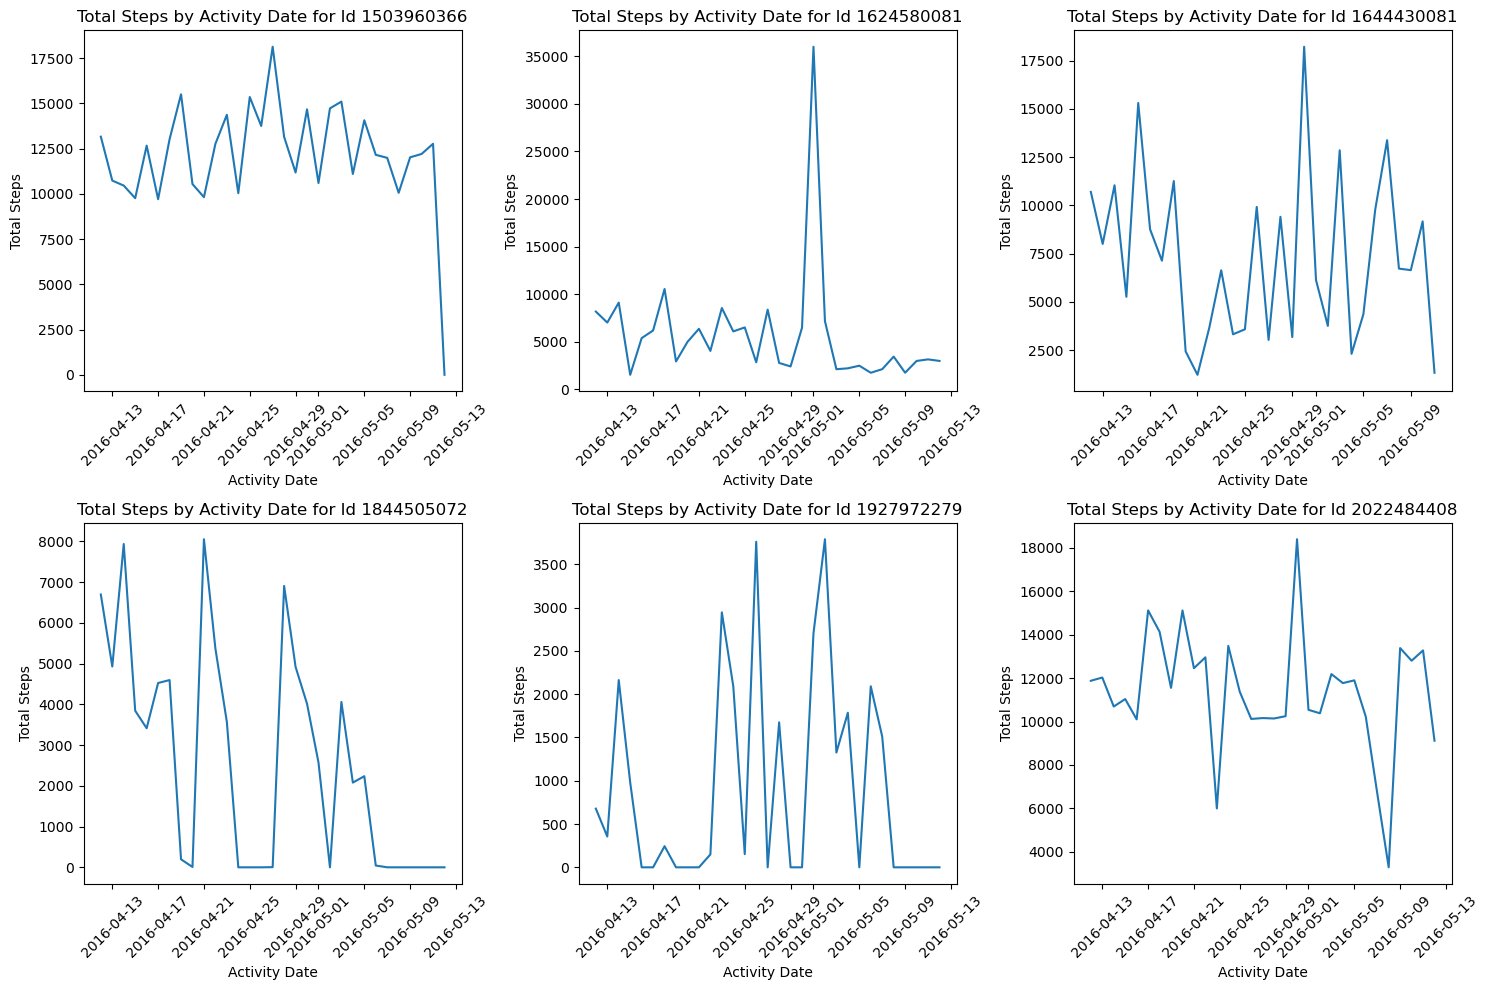

In [21]:
unique_ids = df_daily_activity_merged['id'].unique()[:6]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
for i, user_id in enumerate(unique_ids):
    # Filter rows where Id is user_id
    filtered_df = df_daily_activity_merged[df_daily_activity_merged['id'] == user_id]

    # Extract the TotalSteps and ActivityDate columns
    total_steps = filtered_df['total_steps']
    activity_date = filtered_df['activity_date']

    # Plot TotalSteps against ActivityDate in the corresponding subplot
    ax = axes[i // 3, i % 3]
    ax.plot(activity_date, total_steps)
    ax.set_xlabel('Activity Date')
    ax.set_ylabel('Total Steps')
    ax.set_title(f'Total Steps by Activity Date for Id {user_id}')
    ax.tick_params(axis='x', rotation=45)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


This does not appear to be the case. "0 days" are probably the result of the user not wearing their FitBit device. How many of these were there?

In [22]:
# Filter rows where "total_steps" is 0
zero_steps_df = df_daily_activity_merged[df_daily_activity_merged['total_steps'] == 0]

# Group by "id" and count the number of rows for each user
zero_steps_count = zero_steps_df.groupby('id').size()

print(zero_steps_count)

id
1503960366     1
1844505072    10
1927972279    14
4020332650    14
4057192912     1
4702921684     1
5577150313     2
6117666160     5
6290855005     5
6775888955     9
7007744171     2
7086361926     1
8253242879     1
8583815059     1
8792009665    10
dtype: int64


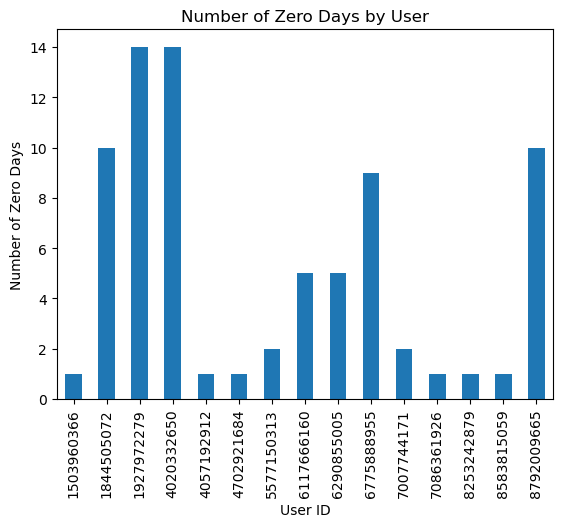

In [23]:
# Filter rows where "total_steps" is 0
zero_steps_df = df_daily_activity_merged[df_daily_activity_merged['total_steps'] == 0]

# Group by "id" and count the number of rows for each user
zero_steps_count = zero_steps_df.groupby('id').size()

# Plotting the bar chart
zero_steps_count.plot(kind='bar')
plt.xlabel('User ID')
plt.ylabel('Number of Zero Days')
plt.title('Number of Zero Days by User')
plt.show()

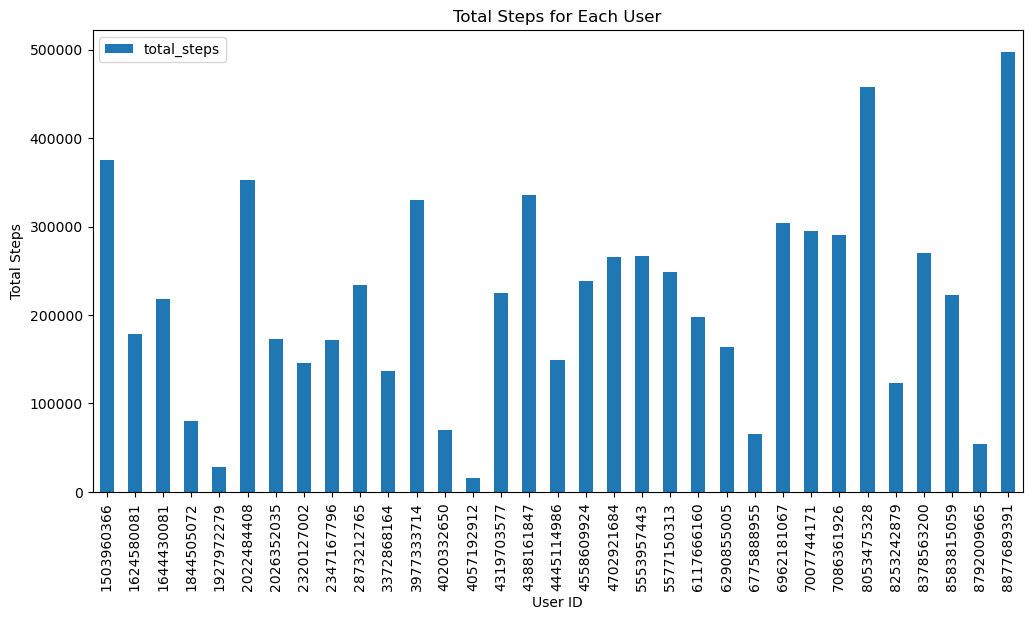

In [24]:
grouped_df = df_daily_activity_merged.groupby("id").agg({"total_steps": "sum"})

grouped_df.plot(kind="bar", figsize=(12, 6))
plt.xlabel("User ID")
plt.ylabel("Total Steps")
plt.title("Total Steps for Each User")
plt.show()


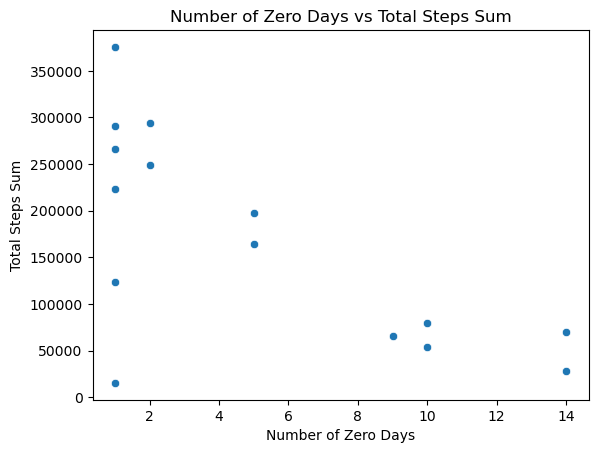

In [25]:
# Group by "id" and calculate the sum of "total_steps" for each user
steps_sum = df_daily_activity_merged.groupby('id')['total_steps'].sum().reset_index()

# Merge with the counts of zero days for each user
merged_df = pd.merge(steps_sum, zero_steps_df.groupby('id').size().reset_index(), on='id')
merged_df.columns = ['id', 'total_steps_sum', 'zero_days_count']

# Plotting the scatter plot
sns.scatterplot(data=merged_df, x='zero_days_count', y='total_steps_sum')
plt.xlabel('Number of Zero Days')
plt.ylabel('Total Steps Sum')
plt.title('Number of Zero Days vs Total Steps Sum')
plt.show()

This plot shows the general pattern that the fewer zero days a user has, the more steps they have accumulated. However we have a clear outlier at the bottom left.

In [26]:
# Sort by "total_steps" in ascending order and get the first row
first_row = steps_sum.sort_values(by="total_steps", ascending=True).head(1).reset_index(drop=True)

# Convert the DataFrame to string and hide the index
first_row_str = first_row.to_string(index=False)

print(first_row_str)

        id  total_steps
4057192912        15352


Let's analyze the aforementioned outlier. The user with the id 4057192912. Let's analyze his activity patterns in more detail. Furthermore it will be interesting to see if larger datasets with more users contain more of such user behaviour. Wearing the FitBit continuosly but not being very active while doing so. Such users could maybe be motivated by targeted marketing campaigns and notifications to increase their activity. This might lead to health benefits and thus customer satisfaction and retention.

Also as an alternative to the static approach we took above to find out the user 4057192912, we can generate an interactive plotly graph and hover over the datapoint to find out the id.

In [27]:
# Creating an interactive scatter plot with hover information
fig = px.scatter(merged_df, x='zero_days_count', y='total_steps_sum', hover_data=['id'])
fig.update_layout(
    title='Number of Zero Days vs Total Steps Sum',
    xaxis_title='Number of Zero Days',
    yaxis_title='Total Steps Sum'
)
fig.show()

Further analysis of user 4057192912 to analyze activity patterns

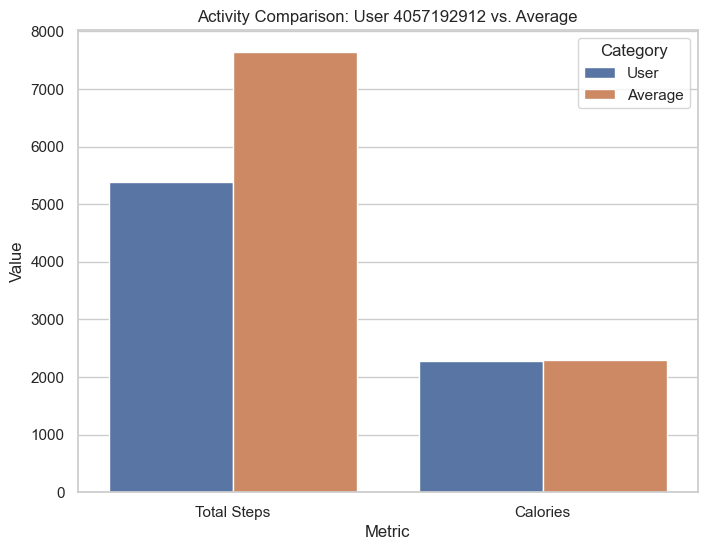

In [28]:
# Filter the DataFrame for user '4057192912'
user_data = df_daily_activity_merged[df_daily_activity_merged['id'] == '4057192912']

# Calculate the average values for the entire dataset
avg_steps = df_daily_activity_merged['total_steps'].mean()
avg_calories = df_daily_activity_merged['calories'].mean()

# Get the values for user '4057192912'
user_steps = user_data['total_steps'].values[0]
user_calories = user_data['calories'].values[0]

# Create a DataFrame for comparison
comparison_data = pd.DataFrame({
    'Metric': ['Total Steps', 'Calories'],
    'User': [user_steps, user_calories],
    'Average': [avg_steps, avg_calories]
})

# Plot the comparison using seaborn
sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))
sns.barplot(x='Metric', y='Value', hue='Category', data=comparison_data.melt('Metric', var_name='Category', value_name='Value'))
plt.title('Activity Comparison: User 4057192912 vs. Average')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.show()

---
---

## Business recommendations


Too many users on too many days don't wear their FitBit at all. 
To encourage users to wear FitBits more often, we should consider these techniques:

1. Encourage users to set achievable goals and track progress.
2. Use gamification elements like rewards and challenges.
3. Incorporate social features for support and accountability.
4. Send reminders and notifications to wear the device.
5. Provide personalized insights and recommendations.
6. Organize challenges and offer incentives. For example, users could be eligible for competitions with sports equipment as rewards if they achieve a certain activity threshold.
7. Educate users about the benefits of wearing devices.
8. Stay updated with new features and innovations.
